In [202]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle
import PIL.Image as image
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

%matplotlib inline

# Loading Dataset

In [172]:
datadir = 'Weather'
class_names = []
for i in os.listdir(datadir):
    class_names.append(i)
num_classes = len(class_names)
print(class_names,num_classes)

['Cloudy', 'Foggy', 'Rainy', 'Snowy', 'Sunny'] 5


In [173]:
flat_data_arr=[]
target_arr=[]
for i in class_names:
  path=os.path.join(datadir,i)
  print(f'loaded weather:{i}')
  count =  0
  for img in os.listdir(path):
    if count == 40:
        break
    file_path = os.path.join(path,img)
    img_array = np.array(image.open(file_path)) /255.0
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(class_names.index(i))
    count = count + 1

loaded weather:Cloudy
loaded weather:Foggy
loaded weather:Rainy
loaded weather:Snowy
loaded weather:Sunny


In [174]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target 
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.774814,0.802735,0.836318,0.755381,0.800518,0.839525,0.747960,0.807493,0.855904,0.754917,...,0.666889,0.666889,0.661084,0.667240,0.667240,0.660893,0.726536,0.726536,0.720188,0
1,0.997556,0.997556,0.997556,0.999892,0.999892,0.999892,1.000000,1.000000,1.000000,1.000000,...,0.448266,0.447223,0.439380,0.427000,0.423450,0.415672,0.399782,0.391826,0.385329,0
2,0.724608,0.636762,0.541971,0.675150,0.620287,0.434633,0.605734,0.519621,0.236605,0.627853,...,0.296133,0.319535,0.312374,0.310114,0.320851,0.320917,0.303292,0.305181,0.303464,0
3,0.942201,0.964084,0.997313,0.943578,0.965461,0.998684,0.943342,0.965840,0.998398,0.941586,...,0.346469,0.335486,0.310940,0.266465,0.228202,0.214838,0.206383,0.186265,0.150993,0
4,0.852245,0.873736,0.915409,0.858862,0.887785,0.924941,0.867968,0.902810,0.930316,0.876230,...,0.524344,0.538785,0.549356,0.523322,0.533124,0.542929,0.508401,0.512409,0.521052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.307432,0.601550,0.927040,0.309941,0.604059,0.929549,0.313265,0.607684,0.933024,0.303926,...,0.678134,0.382213,0.221783,0.647238,0.350922,0.208052,0.642493,0.346873,0.197987,4
196,0.153482,0.306423,0.537796,0.154830,0.307771,0.539143,0.157126,0.310067,0.541439,0.162947,...,0.212223,0.276062,0.363358,0.188938,0.375977,0.496846,0.213757,0.402334,0.522705,4
197,0.143203,0.348923,0.754469,0.140958,0.347935,0.763409,0.141135,0.349489,0.766825,0.146384,...,0.721732,0.735887,0.726174,0.688388,0.702895,0.694533,0.636466,0.655206,0.653799,4
198,0.461323,0.607778,0.810695,0.453140,0.608426,0.808254,0.451260,0.609391,0.807926,0.457571,...,0.199661,0.273499,0.369744,0.244794,0.288690,0.300853,0.176383,0.220642,0.229549,4


# Training and Testing Data Split

In [175]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

In [176]:
from sklearn.neighbors import KNeighborsClassifier
knn = OneVsRestClassifier(KNeighborsClassifier())

In [177]:
knn.fit(x_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [178]:
knn.predict(x_test[0:10])

array([2, 4, 1, 1, 3, 1, 3, 4, 3, 1])

In [179]:
print(x_train.shape)
print(x_test.shape)

(160, 67500)
(40, 67500)


In [180]:
print(y_train.shape)
print(y_test.shape)

(160,)
(40,)


In [181]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\Ganpati Kumar Roy\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Accuracy

In [182]:
y_pred = logreg.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))

0.425


In [183]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.45


In [184]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.55


In [185]:
k_range = range(1, 26)

accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    
print(accuracy)

[0.425, 0.4, 0.475, 0.475, 0.45, 0.475, 0.5, 0.425, 0.55, 0.55, 0.525, 0.5, 0.5, 0.5, 0.5, 0.525, 0.525, 0.525, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


# Accuracy Graph

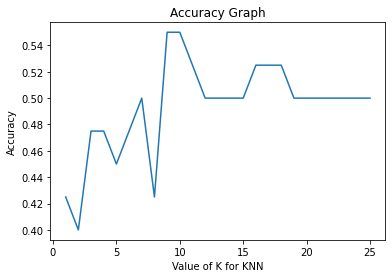

In [203]:
plt.title('Accuracy Graph')
plt.plot(k_range, accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show()

In [200]:
%time
print('KNN Accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred))

Wall time: 0 ns
KNN Accuracy: 0.500


# Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.5')

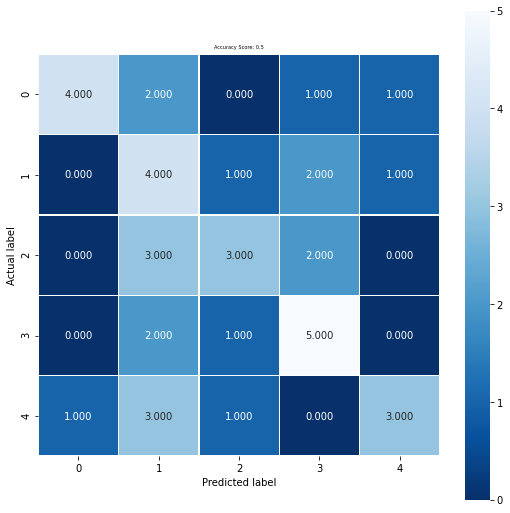

In [201]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title,size=5)